In [6]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

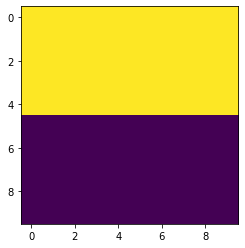

In [7]:
input_image = np.zeros((1,10,10,1))
input_image[0,0:5,:] = 255

plt.imshow(input_image[0])

In [8]:
def pool_forward(A_prev, hparameters, mode ='max'):

    m, n_H_prev, n_W_prev, n_C_prev = A_prev.shape
    f = hparameters['f']
    stride = hparameters['stride']

    n_H = int((n_H_prev-f)/stride) + 1
    n_W = int((n_W_prev-f)/stride) + 1
    n_C = n_C_prev

    A = np.zeros((m, n_H, n_W, n_C))
    
    for i in range(m):
        for h in range(0,n_H, stride):
            for w in range(0, n_W, stride):
                for c in range(0, n_C):

                    a_prev_slice = A_prev[i, h:h+f, w:w+f, c]
                    if mode == 'max':
                        A[i,h,w,c] = np.max(a_prev_slice) 
                    if mode == 'average':
                        A[i,h,w,c] = np.mean(a_prev_slice) 
                    if mode == 'min':
                        A[i,h,w,c] = np.min(a_prev_slice)
    
    assert A.shape == (m, n_H, n_W, n_C)

    return (A, hparameters)



In [9]:
(A_max, hparameters) = pool_forward(input_image, {'f':2,'stride':1}, mode ='max')
(A_avg, hparameters) = pool_forward(input_image, {'f':2,'stride':1}, mode ='average')
(A_min, hparameters) = pool_forward(input_image, {'f':2,'stride':1}, mode ='min')

-----Input----


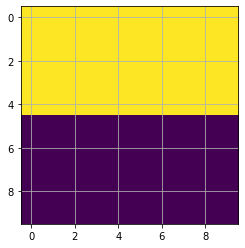

-----Max Pool----


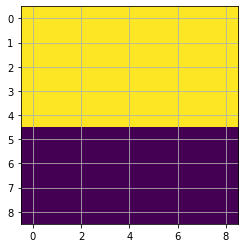

-----Min Pool----


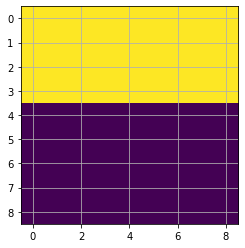

-----Average Pool----


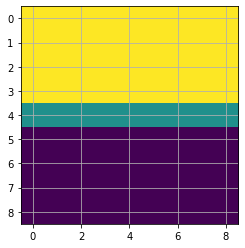

In [10]:
print('-----Input----')
plt.imshow(input_image[0])
plt.grid()
plt.show()
print('-----Max Pool----')
plt.imshow(A_max[0])
plt.grid()
plt.show()
print('-----Min Pool----')
plt.imshow(A_min[0])
plt.grid()
plt.show()
print('-----Average Pool----')
plt.imshow(A_avg[0])
plt.grid()
plt.show()

-----Input----


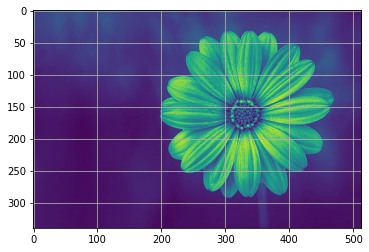

-----Max Pool----


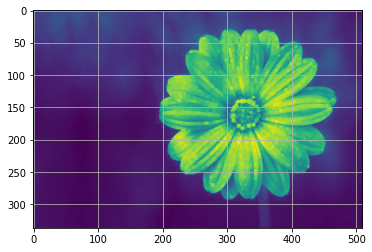

-----Min Pool----


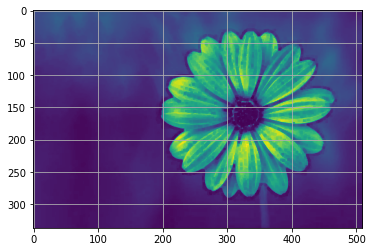

-----Average Pool----


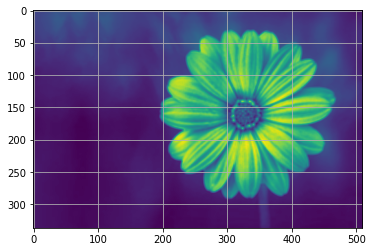

In [11]:
input_image = cv2.imread(r'helper/flower.jpg')
input_image = cv2.cvtColor(input_image, cv2.COLOR_BGR2GRAY)
input_image = input_image[np.newaxis,:]
input_image = input_image[:,:,:, np.newaxis]

(A_max, hparameters) = pool_forward(input_image, {'f':4,'stride':1}, mode ='max')
(A_avg, hparameters) = pool_forward(input_image, {'f':4,'stride':1}, mode ='average')
(A_min, hparameters) = pool_forward(input_image, {'f':4,'stride':1}, mode ='min')

print('-----Input----')
plt.imshow(input_image[0])
plt.grid()
plt.show()
print('-----Max Pool----')
plt.imshow(A_max[0])
plt.grid()
plt.show()
print('-----Min Pool----')
plt.imshow(A_min[0])
plt.grid()
plt.show()
print('-----Average Pool----')
plt.imshow(A_avg[0])
plt.grid()
plt.show()

### Choice of pooling layer

![title](helper/1.JPG)
![title](helper/2.JPG)

## Learnings
* pooling has no learnable hyperparameter
* Number of filters post pooling remain same as previous layer. Just the h,w of output reduces to (h_prev-f)/stride+1
* Average pool blurs it by 1 pixel (for filter window 2*2)
* Max pooling works better for white object in black bacground, min pooling for black object and white background. 
